In [172]:
#This program uses the Double exponential Moving Average (DEMA to Determine when to buy and sell stock)

In [173]:
#Import the liberies
import pandas  as pd 
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [174]:
#load the stock data
df= yf.Ticker('AMZN').history(start='2019-03-04',end='2020-08-12')

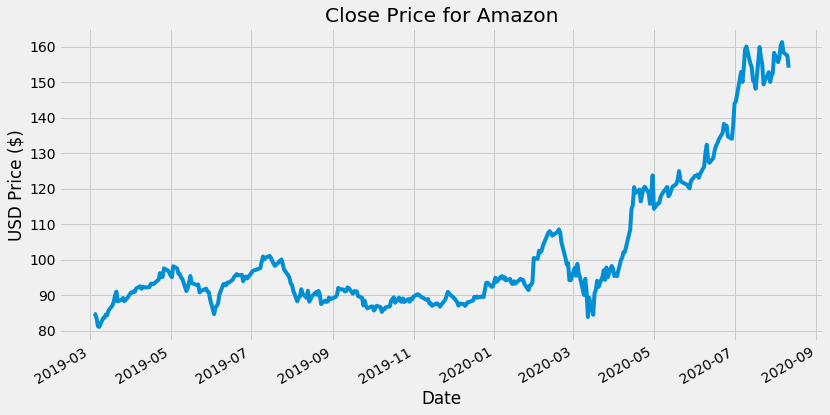

In [175]:
#Visually show the close price
df['Close'].plot(figsize=(12.2,6.4))
plt.title('Close Price for Amazon')
plt.ylabel('USD Price ($)')
plt.xlabel('Date')
plt.show()

In [176]:
#Create a function to calculate the double exponential moving average (DEMA)
def DEMA(data,time_period,column):
    #Calculate the exponental moving averag for some time period
    EMA = data[column].ewm(span=time_period, adjust=False).mean()
    #Calculate the DEMA
    DEMA=2*EMA-EMA.ewm(span=time_period,adjust=False).mean()
    return DEMA

In [177]:
#Store the short term DEMA(20 day period) and the long term DEMA (50 day period) into the data set
df['DEMA_short']= DEMA(df,20,'Close')
df['DEMA_long']= DEMA(df,50,'Close')

In [178]:
#Plot the chart
#Create a list of columns to keep
column_list = ['DEMA_short','DEMA_long','Close']

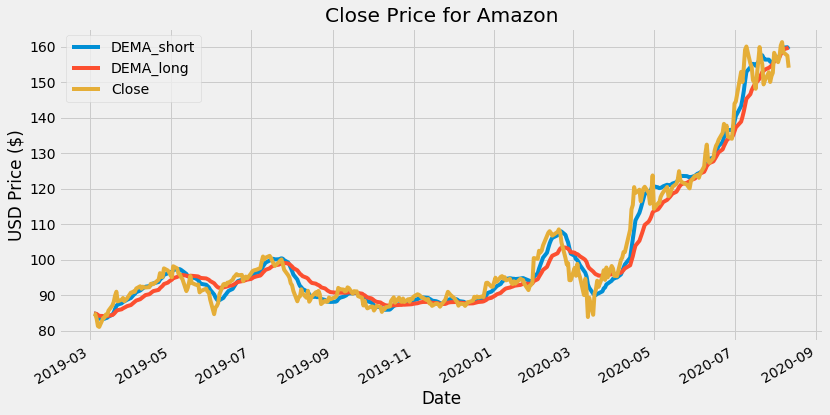

In [179]:
#Visually show the close price
df[column_list].plot(figsize=(12.2,6.4))
plt.title('Close Price for Amazon')
plt.ylabel('USD Price ($)')
plt.xlabel('Date')
plt.show()

In [194]:
#create a function to buy and sell the stock(the trading strategy)
buy_list = []
sell_list =[]
flag = False
#loop through the data
for i in range(0,len(df)):
    if df['DEMA_short'][i] > df['DEMA_long'][i] and flag == False:
        buy_list.append(df['Close'][i])
        sell_list.append(np.nan)
        flag = True
    elif df['DEMA_short'][i] < df['DEMA_long'][i] and flag == True:
        sell_list.append(df['Close'][i])
        buy_list.append(np.nan)
        flag=False
    else:
        buy_list.append(np.nan)
        sell_list.append(np.nan)
        
#Store the buy and sell signals/list into data set
df['Buy']=buy_list
df['Sell']=sell_list

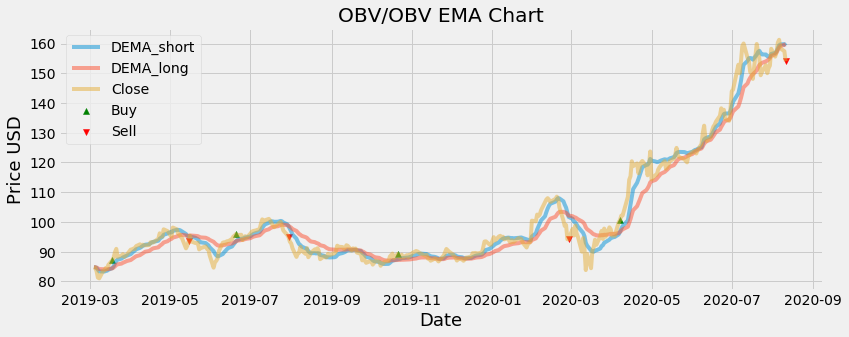

In [195]:
#create Buy and sell columns
plt.figure(figsize=(12.2,4.5))
for i in column_list:
    plt.plot(df[i],label=i,alpha=0.50)
plt.scatter(df.index,df['Buy'],label='Buy',marker='^',alpha=1,color='green')
plt.scatter(df.index,df['Sell'],label='Sell',marker='v',alpha=1,color='red')
plt.title('OBV/OBV EMA Chart')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD',fontsize=18)
plt.legend(loc='upper left')
plt.show()